<a href="https://colab.research.google.com/github/mpiatek26/Sophisticated_Data_Cleaning_and_Preparation/blob/main/Sophisticated_Data_Cleaning_and_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
import missingno as msno

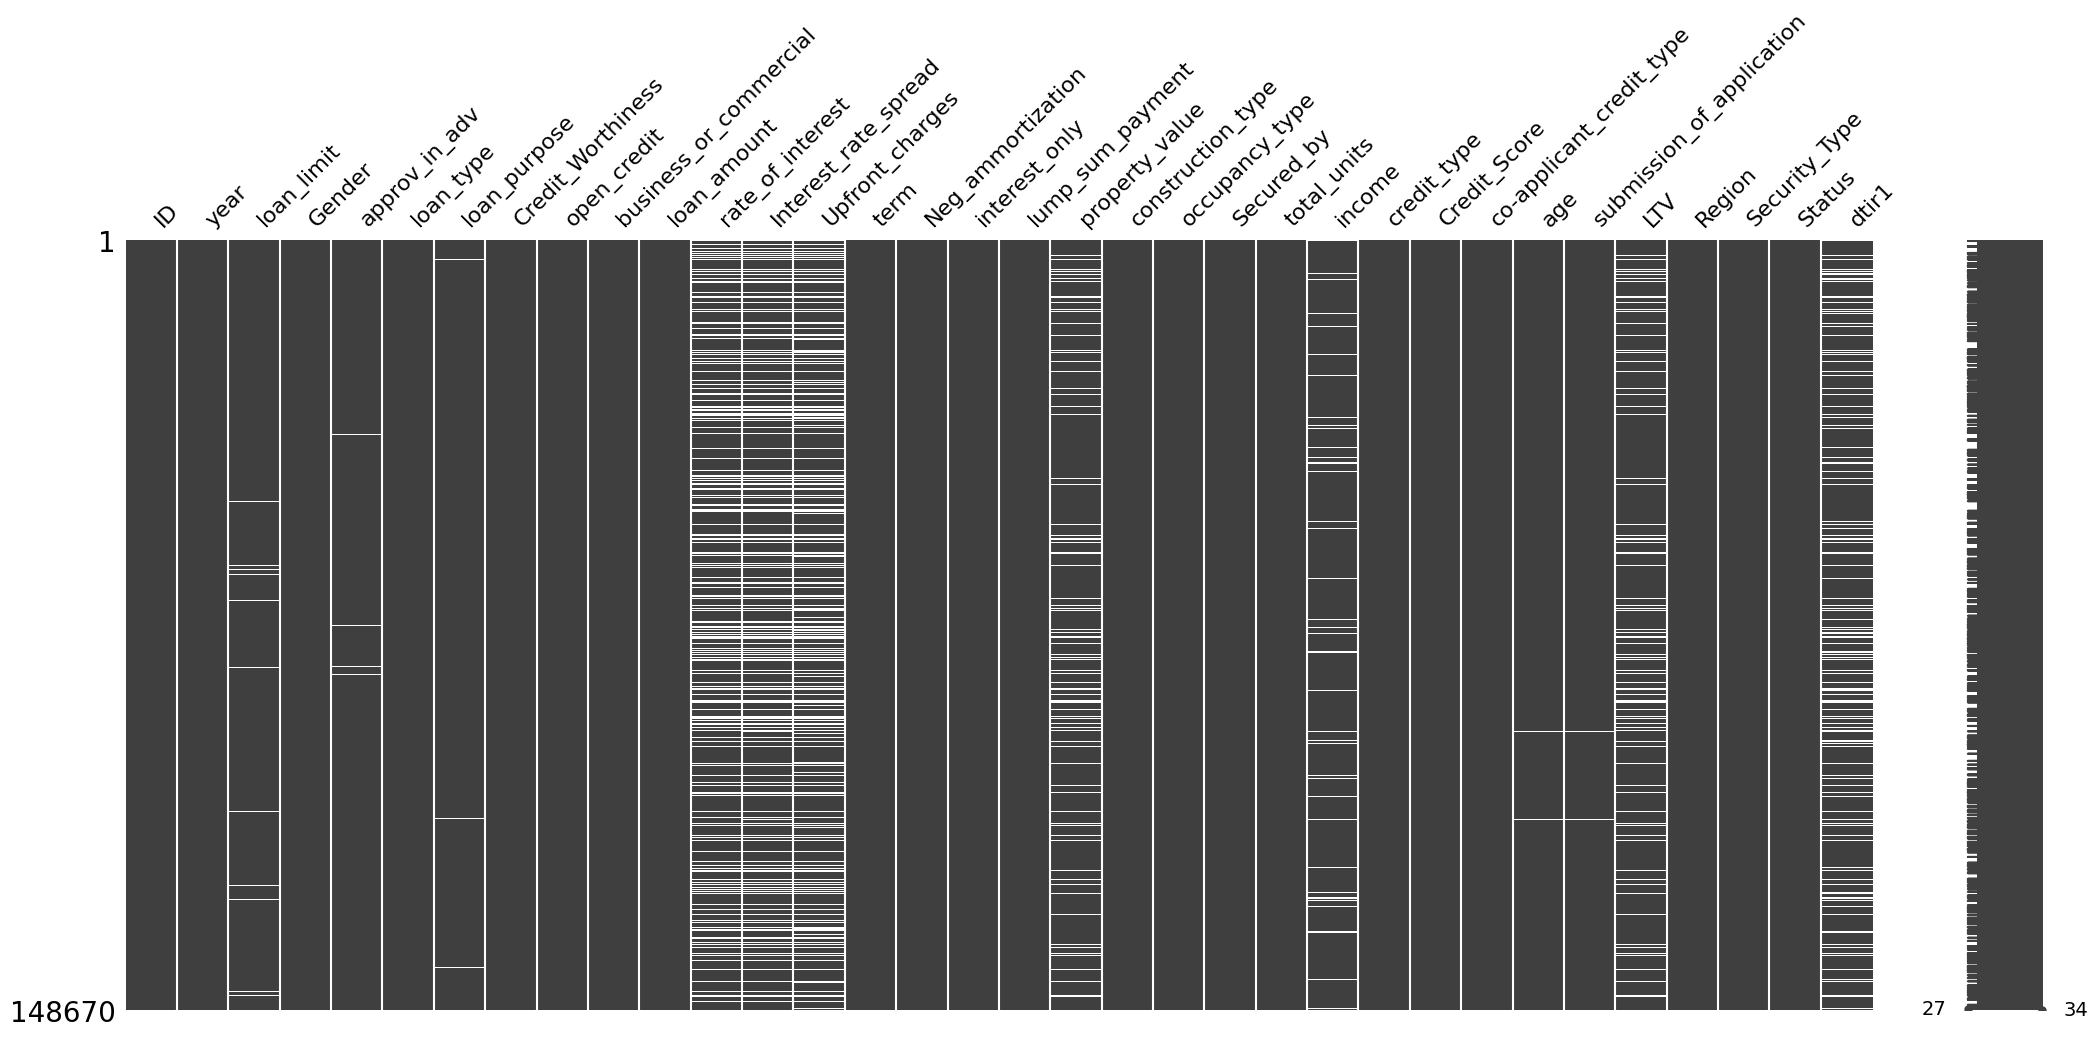

<Figure size 1500x900 with 0 Axes>

In [5]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

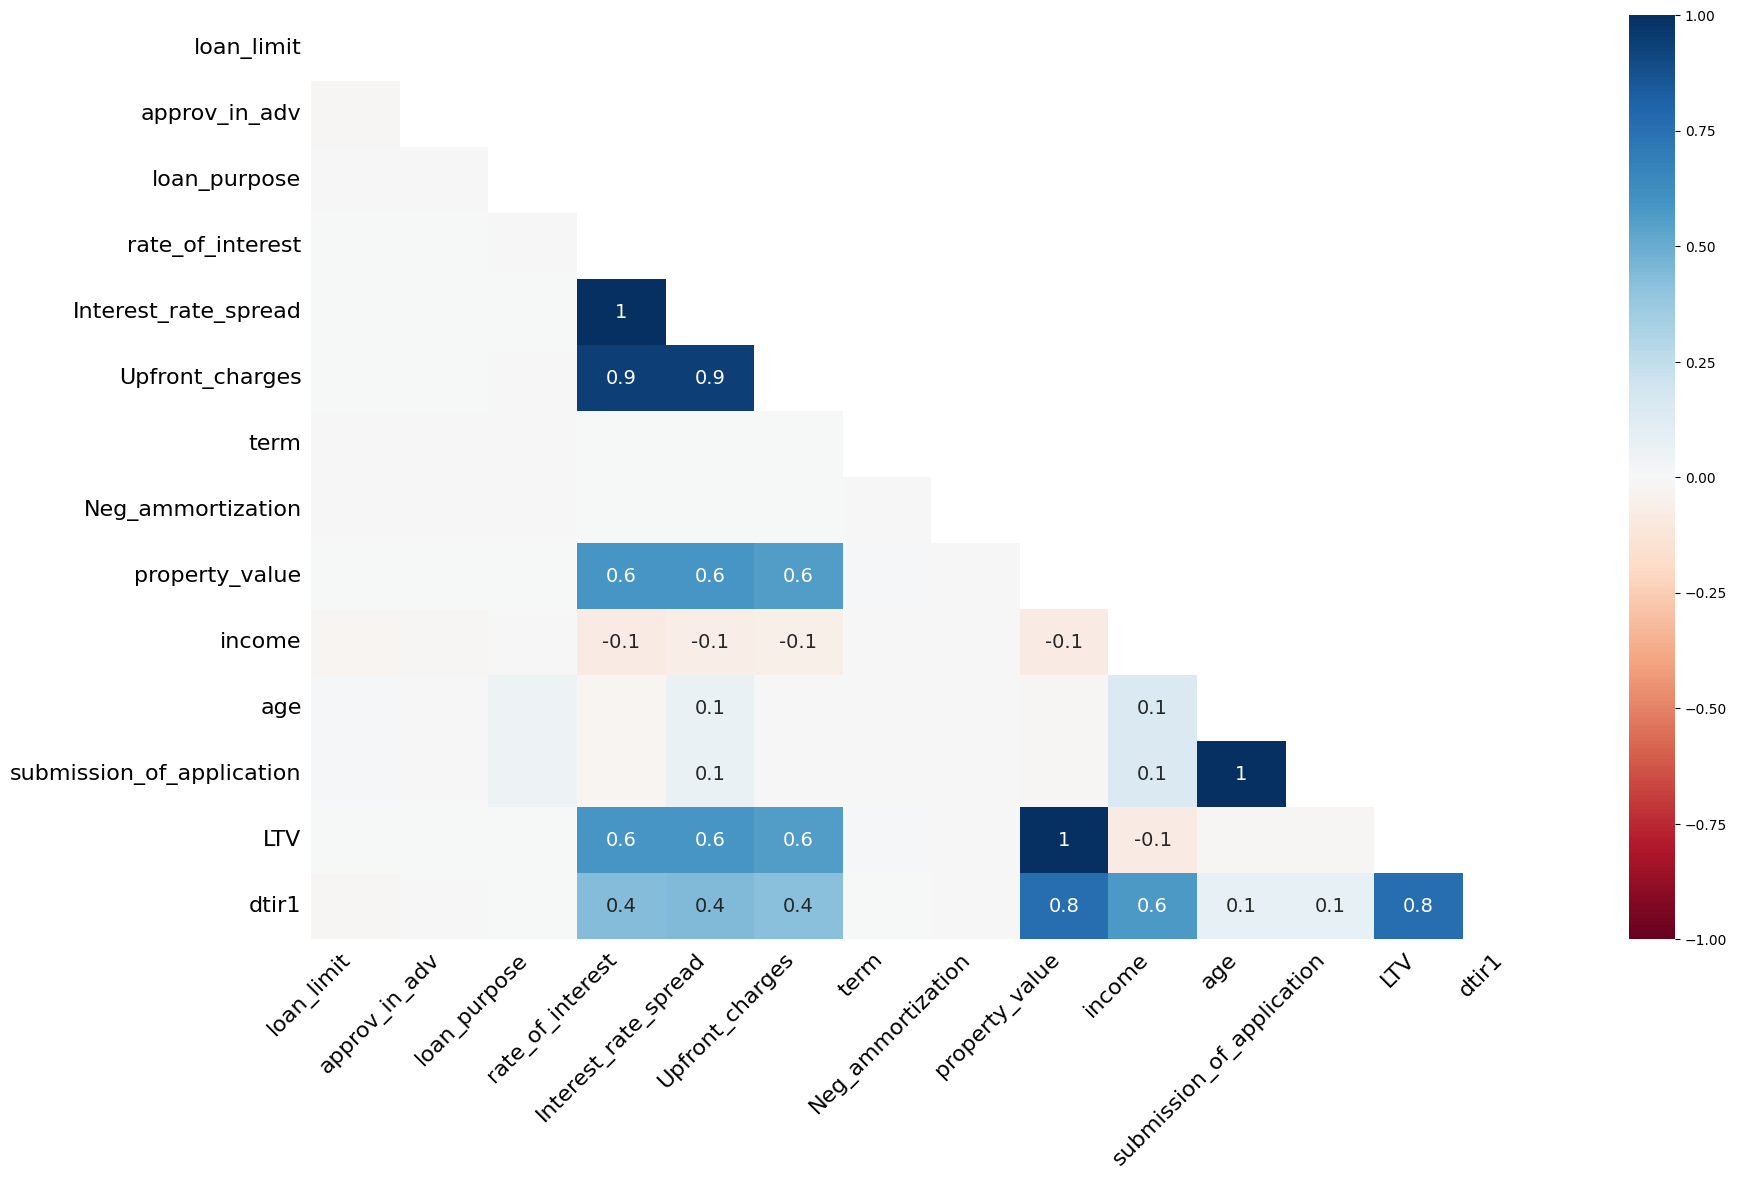

In [6]:
msno.heatmap(df, labels = True)

In [7]:
# Columns having missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

<Axes: >

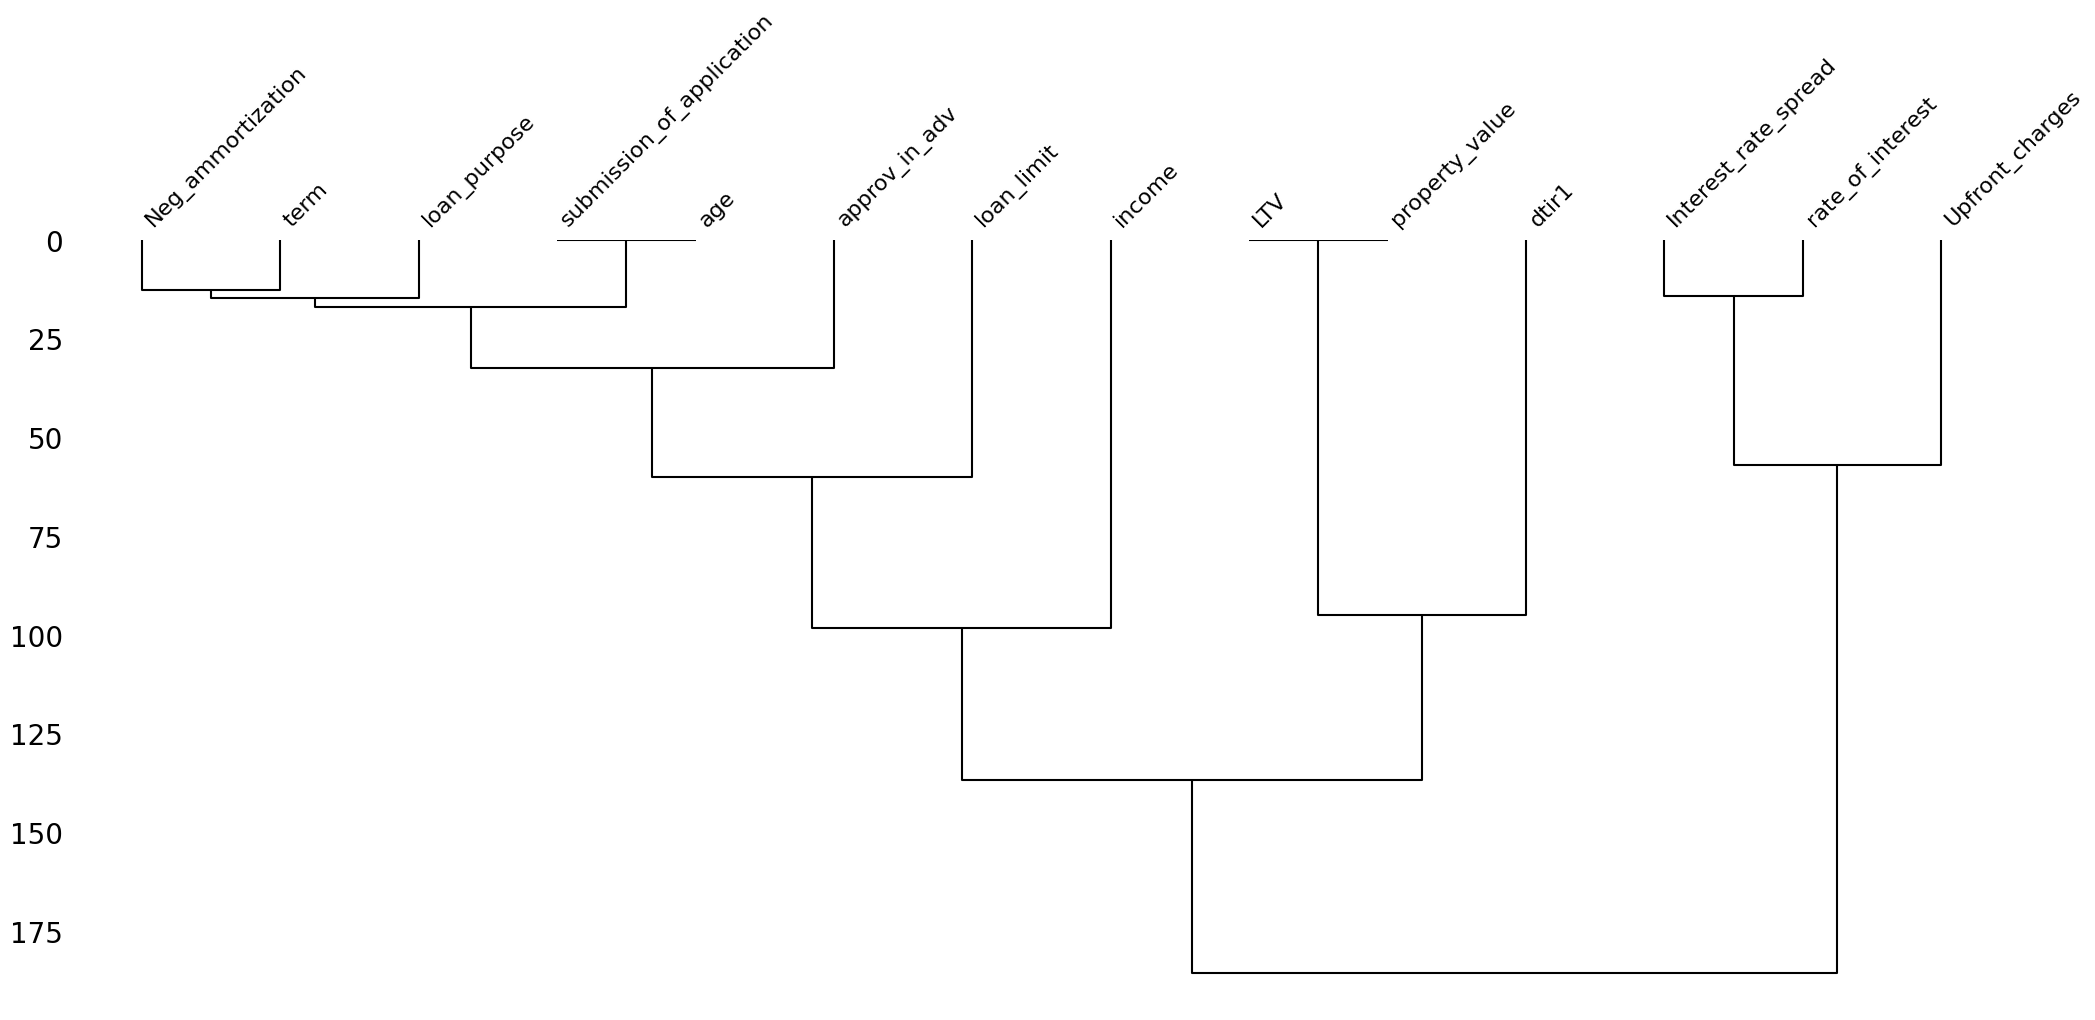

In [8]:
msno.dendrogram(df[missing_columns])

In [9]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [10]:
missing_percent = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [11]:
df_temp = df.copy()

In [14]:
# Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 25

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD and col in df_temp.columns:
        df_temp.drop(col, axis=1, inplace=True)


In [15]:
_ = get_numerical_summary(df_temp)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [16]:
del df_temp

In [17]:
df_temp = df.copy()

In [18]:
# Getting Missing count of each sample

for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum()

In [19]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 5

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 148670
Samples After Removal : 132360


In [20]:
del df_temp

In [21]:
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [22]:
df.loan_limit.value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [23]:
df[cat_missing_cols] = df[cat_missing_cols].fillna('Missing')
df.loan_limit.value_counts()

cf         135348
ncf          9978
Missing      3344
Name: loan_limit, dtype: int64

In [24]:
df[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 148670 non-null  object
 1   approv_in_adv              148670 non-null  object
 2   loan_purpose               148670 non-null  object
 3   Neg_ammortization          148670 non-null  object
 4   age                        148670 non-null  object
 5   submission_of_application  148670 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


In [25]:
from sklearn.impute import KNNImputer

df_temp = df.copy()

In [26]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [27]:
# Initializing KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_temp)

KNNImputer(n_neighbors=3)

In [28]:
X = knn.transform(df_temp)

In [29]:
df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [30]:
del df_temp

In [31]:
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [32]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()

In [33]:
income = df['income']

In [34]:
df_temp = df.copy()

In [37]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [41]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df[col].dtype != 'object']

    # df = df[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred

    return df

In [42]:
print(df_temp.columns)


Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


In [43]:
df_new = tree_imputation(df_temp)
df_new.info()

<ipython-input-41-47f246b188a7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_missing[col] = y_pred
<ipython-input-41-47f246b188a7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_missing[col] = y_pred
<ipython-input-41-47f246b188a7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

<ipython-input-41-47f246b188a7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_missing[col] = y_pred


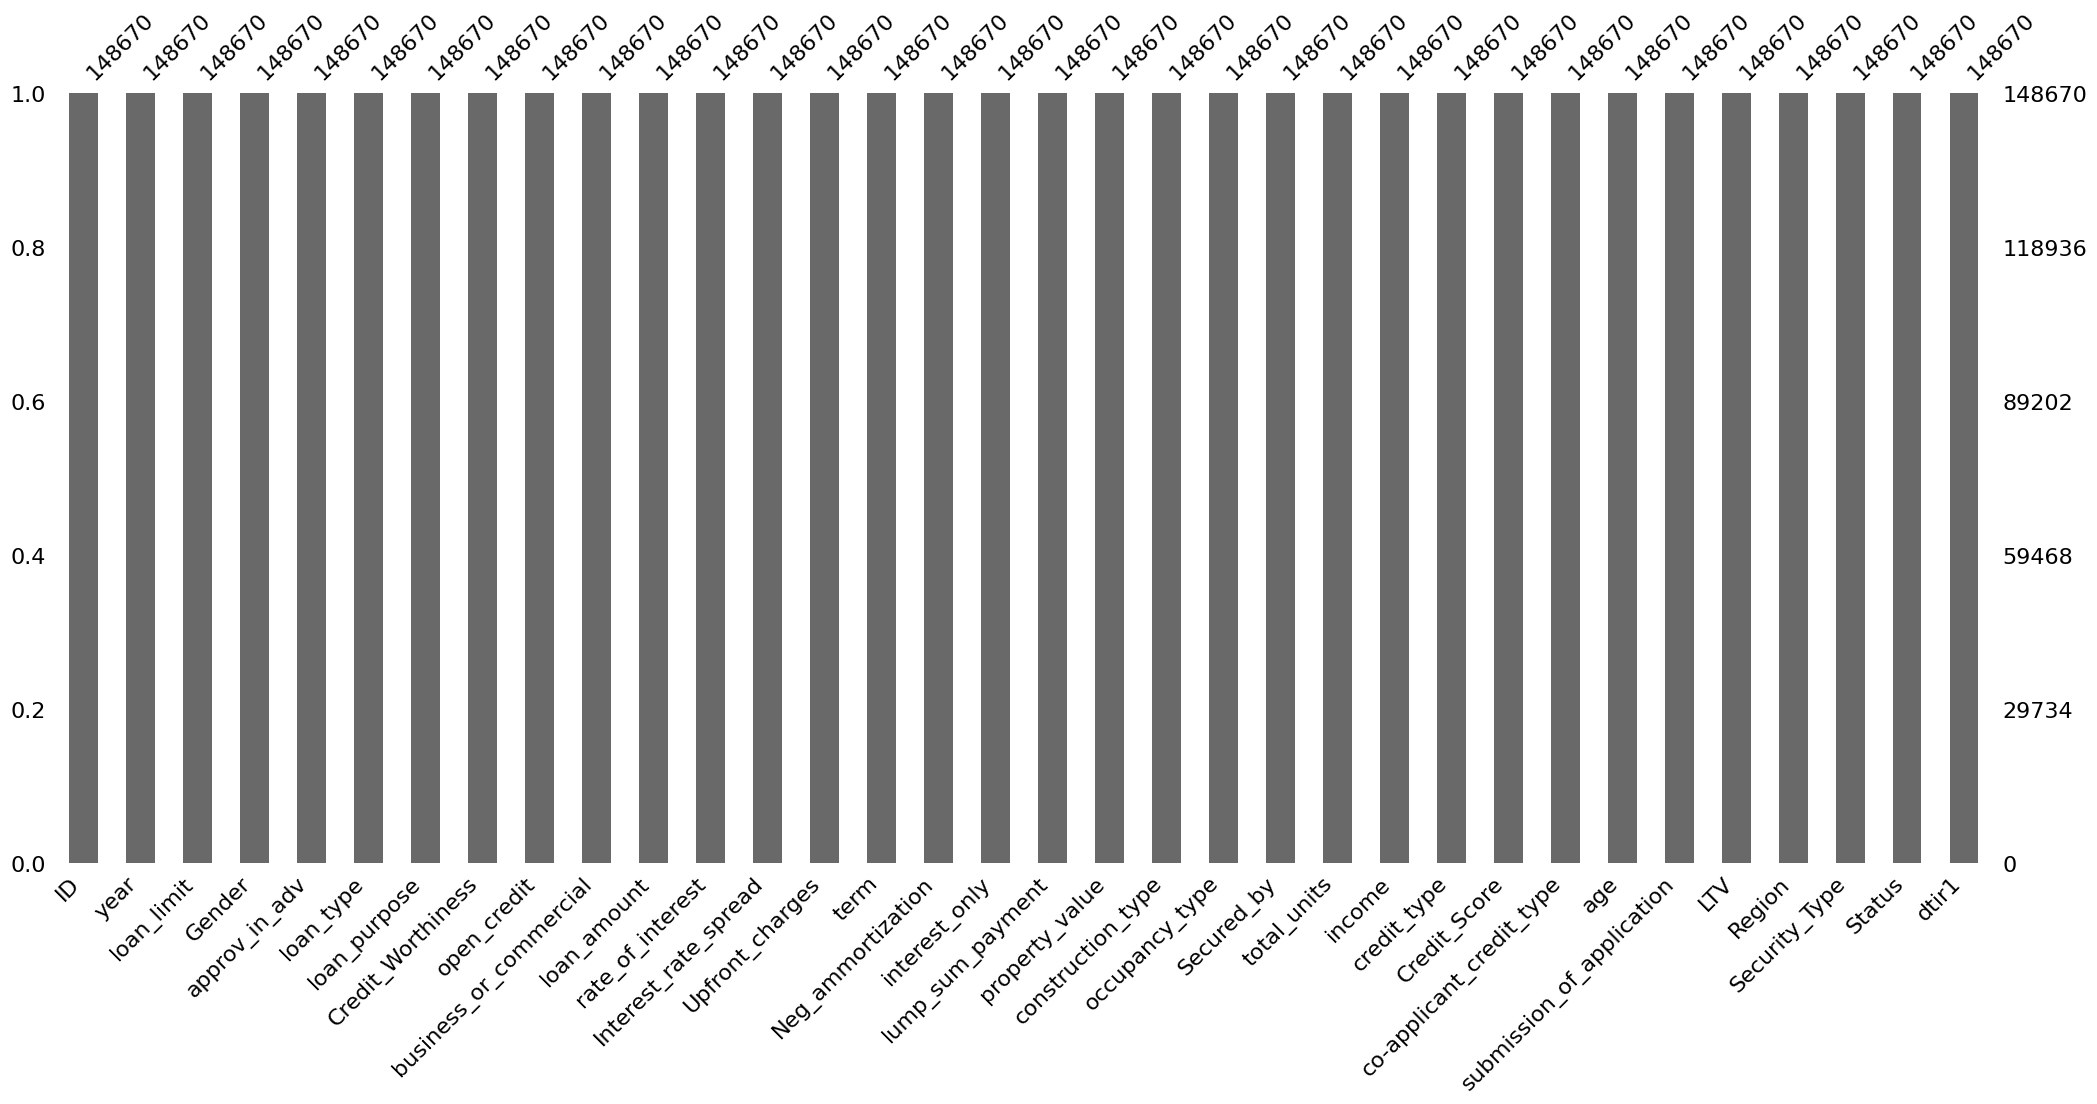

In [44]:
msno.bar(df_new)
plt.show()

In [45]:
df_new = pd.concat([df[cat_cols], df_new.drop(cat_cols, axis = 1)], axis = 1)
df_new.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.115125,0.583202,3716.420,360.0,118000.0,1740.0,758,98.728814,1,45.000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,3.490625,1.178557,1284.555,360.0,189000.0,4980.0,552,99.346252,1,40.225
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,4.560000,0.200000,595.000,360.0,508000.0,9480.0,834,80.019685,0,46.000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,4.250000,0.681000,13016.460,360.0,658000.0,11880.0,587,69.376900,0,42.000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.000000,0.304200,0.000,360.0,758000.0,10440.0,602,91.886544,0,39.000


In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   Neg_ammortization          148670 non-null  object 
 9   interest_only              148670 non-null  object 
 10  lump_sum_payment           148670 non-null  object 
 11  construction_type          148670 non-null  object 
 12  occupancy_type             148670 non-null  object 
 13  Secured_by                 14

In [47]:
df_temp = df_new.copy()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [55]:
def likelihood_encoding(df, cat_cols, target_variable = "Status"):
    # cat_cols.remove(target_variable)
    df_temp = df.copy()
    for col in cat_cols:
        effect = {}
        print(col)
        for category in df[col].unique():
            print(category)

            try:
                temp = df[df[col] == category]
                lr = LogisticRegression()
                X = temp.drop(target_variable, axis = 1, inplace = False)
                y = temp[target_variable]
                # print(temp.drop(target_variable, axis = 1).isnull().sum())
                lr.fit(X, y)

                effect[category] = accuracy_score(y, lr.predict(X))
            except Exception as E:
                print(E)

        for key, value in effect.items():
            effect[key] = np.log(effect[key] / (1 - effect[key] + 1e-6))

        df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)
    return df_temp

In [56]:
df_temp = likelihood_encoding(df_temp, cat_cols)

In [52]:
df_temp.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,1,3,1,0,1,0,0,1,2,1,...,4.115125,0.583202,3716.420,360.0,118000.0,1740.0,758,98.728814,1,45.000
1,1,2,1,1,1,0,0,0,2,1,...,3.490625,1.178557,1284.555,360.0,189000.0,4980.0,552,99.346252,1,40.225
2,1,2,2,0,1,0,0,1,1,1,...,4.560000,0.200000,595.000,360.0,508000.0,9480.0,834,80.019685,0,46.000
3,1,2,1,0,4,0,0,1,2,1,...,4.250000,0.681000,13016.460,360.0,658000.0,11880.0,587,69.376900,0,42.000
4,1,1,2,0,1,0,0,1,2,1,...,4.000000,0.304200,0.000,360.0,758000.0,10440.0,602,91.886544,0,39.000


In [57]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  int64  
 1   Gender                     148670 non-null  int64  
 2   approv_in_adv              148670 non-null  int64  
 3   loan_type                  148670 non-null  int64  
 4   loan_purpose               148670 non-null  int64  
 5   Credit_Worthiness          148670 non-null  int64  
 6   open_credit                148670 non-null  int64  
 7   business_or_commercial     148670 non-null  int64  
 8   Neg_ammortization          148670 non-null  int64  
 9   interest_only              148670 non-null  int64  
 10  lump_sum_payment           148670 non-null  int64  
 11  construction_type          148670 non-null  int64  
 12  occupancy_type             148670 non-null  int64  
 13  Secured_by                 14

In [58]:
del df_temp

In [59]:
def target_encoding(df, cat_cols, target_variable = "Status"):

    for col in cat_cols:
        weight = 7
        feat = df.groupby(col)[target_variable].agg(["mean", "count"])
        mean = feat['mean']
        count = feat['count']

        smooth = (count * mean + weight * mean) / (weight + count)

        df.loc[:, col] = df.loc[:, col].map(smooth)

    return df

In [60]:
df_temp = df_new.copy()

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

In [62]:
df_temp = target_encoding(df_temp, cat_cols)

In [63]:
df_temp.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,0.239708,0.285908,0.253272,0.227749,0.258768,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.115125,0.583202,3716.420,360.0,118000.0,1740.0,758,98.728814,1,45.000
1,0.239708,0.261914,0.253272,0.345439,0.258768,0.243277,0.246709,0.345439,0.223805,0.245105,...,3.490625,1.178557,1284.555,360.0,189000.0,4980.0,552,99.346252,1,40.225
2,0.239708,0.261914,0.208937,0.227749,0.258768,0.243277,0.246709,0.230377,0.445965,0.245105,...,4.560000,0.200000,595.000,360.0,508000.0,9480.0,834,80.019685,0,46.000
3,0.239708,0.261914,0.253272,0.227749,0.229749,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.250000,0.681000,13016.460,360.0,658000.0,11880.0,587,69.376900,0,42.000
4,0.239708,0.191623,0.208937,0.227749,0.258768,0.243277,0.246709,0.230377,0.223805,0.245105,...,4.000000,0.304200,0.000,360.0,758000.0,10440.0,602,91.886544,0,39.000


In [64]:
df['age'].value_counts()

45-54      34720
35-44      32818
55-64      32534
65-74      20744
25-34      19142
>74         7175
<25         1337
Missing      200
Name: age, dtype: int64